In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display 

In [2]:
import numpy as np                   
from scipy import stats as st          
import pandas as pd                    
import matplotlib.pyplot as plt      
import seaborn as sns

# Выявление закономерностей определяющих успешность игры

Работнику интернет-магазина "Стримчик", магазин занимается продажей компьютерных игра по всему миру, предоставленные исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Из имеющихся данных необходимо выделить факторы, которые отвечают за то, будет ли игра успешной или нет. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные компании.

Все предоставленные данные имеют сведения до 2016 года. Нужно отработать принцип работы с данными, который позволит спланировать компанию на последующий год.

## Изучение данных из файла

In [3]:
df = pd.read_csv('games.csv')
df.info()
print(f'Количество дубликатов: {df.duplicated().sum()}')
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Количество дубликатов: 0


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Вывод
Датафрэйм предоставленный для исследования содержит 11 столбцов и 16715 наблюдений. В нем содержатся сведения об игре: год выпуска, жанр, подажи в региона, оценки пользователей и критиков и еще возрастной рейтинг. Этих данных должно быть достаточно, чтобы ответить на основную задачу проекта, цель которой заключается в определении факторов, делающих игру успешной и популярной.

## Подготовка данных
Для того, чтобы составить правильную модель определения успешной игры, необходимо сначала сделать тщательную предобработку исходного датафрэйма, поскольку от этого зависит правильность итоговых выводов. В подготовке предстоит заполнить пропуски, переименовать столбцы, привести данные к нужным типа и добавить расчеты.

### Замена названий столбцов (приведение к нижнему регистру)
Предобработку данных начнем прежде всего с переименования столбцов датафрэйма, а точнее нужно просто привести их названия к нижнему регистру:

In [4]:
print(df.columns)
df.columns = df.columns.str.lower()    
print(df.columns)
df.head()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь названия столбцов в нижнем регистре, и благодаря этому к ним стало проще обращаться.

### Преобразование данных в нужные типы
Далее выполним преобразование данных к нужным типам данных, для большего удобства и упрощения работы при исследовании. Значения в столбцах *'year_of_release'* и *'user_score'* приведем к типу Int64, а в столбце *'user_score'* к типу float64:

In [5]:
df.dtypes 

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [6]:
df[['year_of_release', 'critic_score']] = df[['year_of_release', 'critic_score']].astype('Int64')
df.loc[:,'user_score'] = pd.to_numeric(df.loc[:,'user_score'], errors='coerce')

In [7]:
df.dtypes 

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

Типы данных стали более подходящими, и теперь стало удобнее обрабатывать значения года релиза и оценок критиков, а также стало возможным работать с пользовательским рейтингом как с числовыми данными.

### Обработка пропусков
Теперь предстоит приступить к наиболее важному пункту предобработки - это обработка пропусков. В исходных данных имеются относительно небольшое количество пропусков в столбце с датой релиза и весьма значительное количество пропущенных значений с данными об оценке пользователей и кртиков. Думаю пропуски возникли по банальной причине физического отсутствия некоторых  данных на некоторые игры, ведь данные собранны по достаточно большому количеству данных за весьма длительный период времени, да еще и по очень отдаленным регионам. Сложно представить, что до 2000 года, на этапе становления игровой индустрии очень активно собирались данные об оценках пользователей, и всем играм присваивался рейтинг ESRB особенно если учесть, что компания начала свое существование с 1994 года. А еще трудности с получением данных из Японии, при том что регион обладает очень крупным рынком игровой индустрии.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


В столбце с названиями имеются 2 пропуска, рассмотрим их:

In [9]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Эти же стоки отвечают за 2 пропуска столбца *'genre'*. Тут имеются только данные о продажах, поскольку количество сторок всего 2, можно легко избавиться от этих данных.

In [10]:
df = df[df['name'].notnull()]      #удаление данных для неизвестных игр
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


Что касается зполнения пропусков в столбцах *'year_of_release', 'critic_score', 'user_score', 'rating'*. Невозможно на основании имеющихся данных заполнить отсутствующие значения не исказив при этом результаты исследования. Мы не можем верно предположить год релиза или оценки пользователей, и потому все попытки заполнения приведут к сильному смещению значений в сгруппированных данных. Поэтому все пропуски решено оставить без изменений.

 Заполним пропуски столбца *'rating'* значением *undefined*. Благодаря такому заполнению у нас появится еще одна группа игр, в которой отсутствует возрастной рейтинг. Таким образом, появится возможность оценить и проанализировать каков успех при продаже игр без присвоенного возрастного рейтинга.

In [11]:
df['rating'] = df['rating'].fillna('undefined')
df['rating'].unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

### Подсчет суммарных продаж во всех регионах
Для четкого представления о продаваемости и успешности игры необходимо иметь сведения о продажах не только по регионам, но и всеобщую прибыль от игры. Добавим в исходный датафрэм сумму продаж в регионах:

In [12]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] #добаление столбцам с суммой продаж 
df.head()                                                                                #во всех регионах

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


### Вывод
Теперь предобработка всех данных завершена, а значит все данные пригодны для анализа, и для проверки гипотез.

## Исследовательский анализ данных
Предоставленние данные требуется тщательно проанализировать и выявить необходимые зависимости и закономерности.

### Количество выпущенных игр за каждый год


Визуализируем объем выпускаемых игр в различные годы, для оценки соотношения данных за различные периоды:

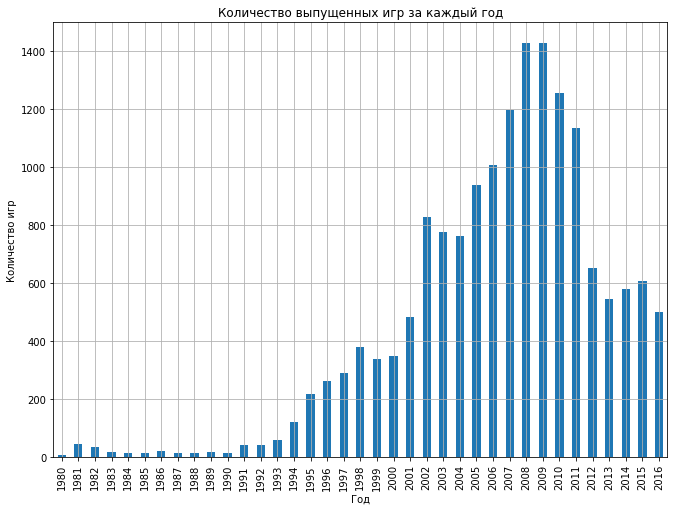

In [13]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', legend=False, grid=True, figsize=(11, 8))
plt.title('Количество выпущенных игр за каждый год')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

На полученном графике отчетливо видна неравномерность количества релизов в разные годы. 

### Анализ изменения продаж по платформам
Рассмотрим как менялись продажи в разные годы, на основаннии данных популярных платформ.

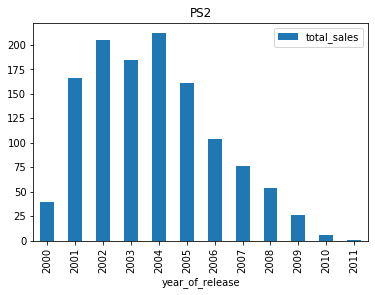

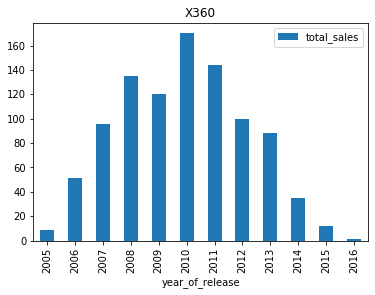

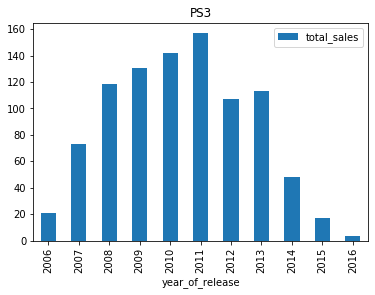

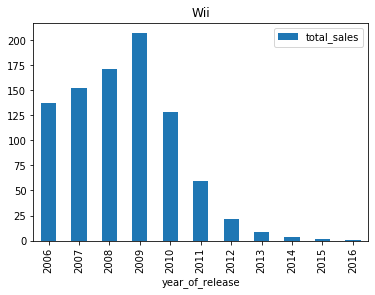

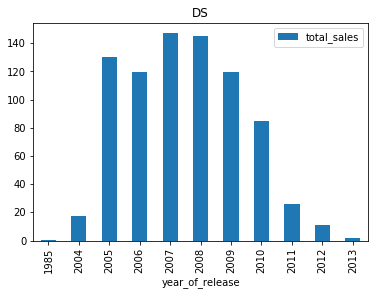

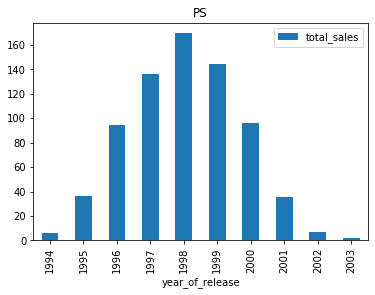

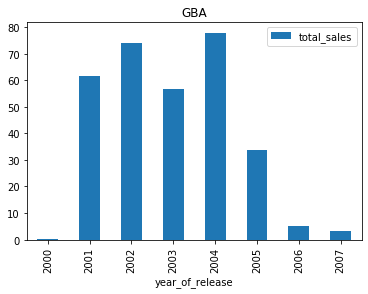

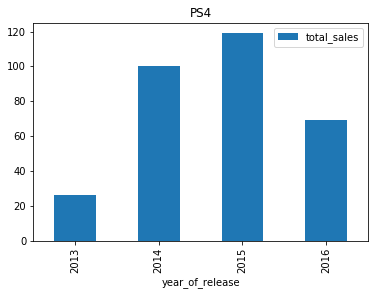

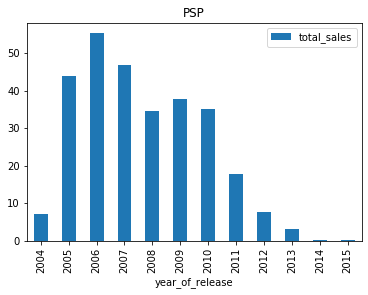

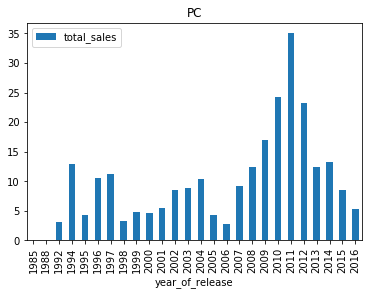

In [14]:
platform_sales = df.groupby('platform').sum().sort_values('total_sales', ascending=False).head(10)

for i in platform_sales.index:                            #цикл отображения продаж за год для успешных платформ
    slice_df = df.query('platform == @i')
    slice_df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', title=i)

Из полученных графиков можно выделить среднюю характерную продолжительность активности различных платформ. Она составлять около 9 лет.

### Определение актуального периода
В исходных данных имеются сведения о продажах игр в период с 1980 по 2016 годы. Такой период излишне продолжителен для нашего анализа, поэтому необходимо выделить **актуальный период**, за время которого собраны сведения самых успешных платформ с высокими продажами. 

Итак, за **актуальный период** принято взять данные начина с 2012 по 2016 годы.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


In [16]:
df = df.query('year_of_release > 2011')           
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
name               2886 non-null object
platform           2886 non-null object
year_of_release    2886 non-null Int64
genre              2886 non-null object
na_sales           2886 non-null float64
eu_sales           2886 non-null float64
jp_sales           2886 non-null float64
other_sales        2886 non-null float64
critic_score       1312 non-null Int64
user_score         1531 non-null float64
rating             2886 non-null object
total_sales        2886 non-null float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 298.7+ KB


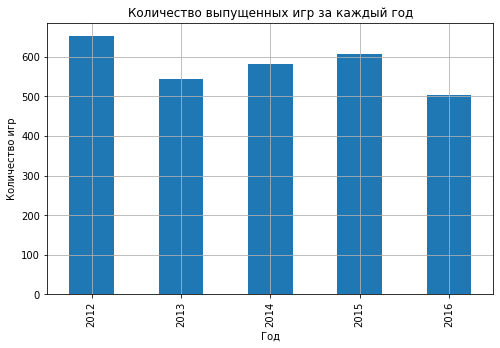

In [17]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title('Количество выпущенных игр за каждый год')
plt.xlabel('Год')                          
plt.ylabel('Количество игр')
plt.show()

В обновленном датафрэйме содержится 2886 строки. Хотя большая часть данных отброшена, теперь мы располагаем более актуальными данными о современных тенденциях.

### Выбор потенциально прибыльных  платформ
Проанализируем общую прибыль для всех платфор за каждый год, и тем самым определим у каких продажи растут, у каких падают, а какие себя изжили.

Сделаем это с помощью сводных таблиц и графиков, отображающих зависимость прибыль платформы за определенный год:

In [18]:
df['platform'].unique() 

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [19]:
pivot_tbl = df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
pivot_tbl  

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,NaN,NaN,NaN
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


График прибыли платформы за каждый год:

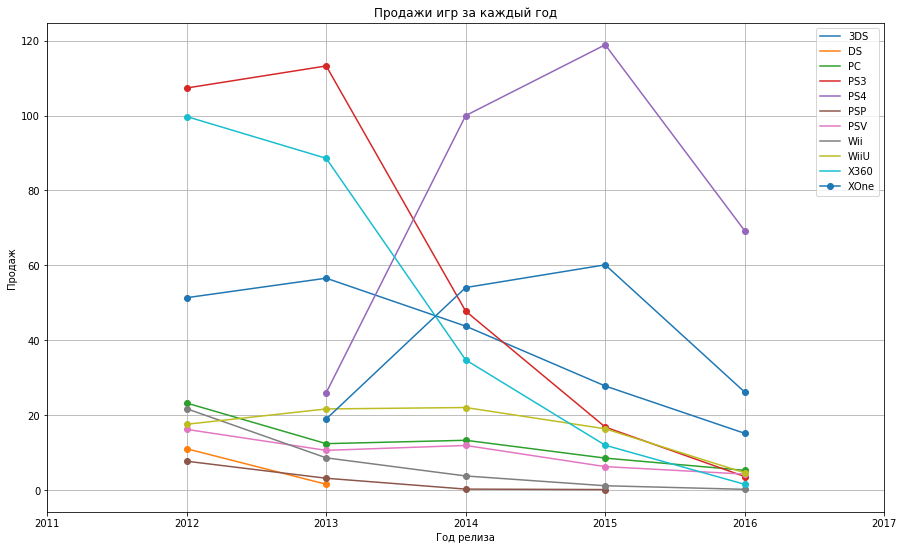

In [20]:
st_1 = df.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
st_1 = st_1.reset_index()
platform_name = st_1['platform'].unique()
ax = st_1.query('platform == "3DS"').plot(x='year_of_release', y='total_sales', style='o-', label='3DS', figsize=(15, 9), grid=True, xlim=(2011, 2017))
plt.title('Продажи игр за каждый год')
plt.ylabel('Продаж')

for i in range(1, 11):
    a = st_1.query('platform == @platform_name[@i]').plot(x='year_of_release', y='total_sales', style='o-', ax=ax, label=platform_name[i], grid=True, xlim=(2011, 2017)) 
    ax = a
    plt.xlabel('Год релиза')

Благодаря этому исследованию можно выделить потенциально прибыльные платформы. Ими являются: **XboxOne, PS4, 3DS, WiiU, PSV и PC**.

### "Ящик с усами"
Исследование разброса данных о количестве глобальных продаж для всех платформ.

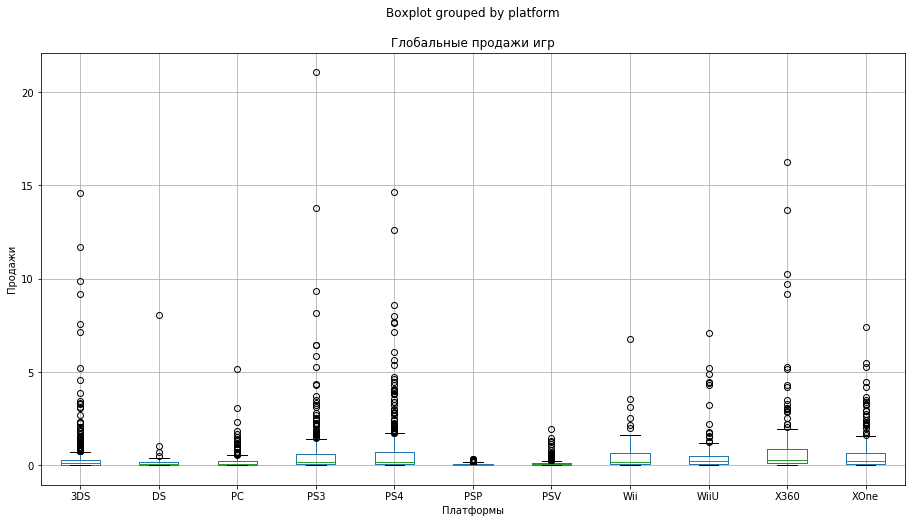

In [21]:
df.boxplot(column='total_sales', by='platform', figsize=(15, 8))
plt.title('Глобальные продажи игр')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

Более детальное отображение:

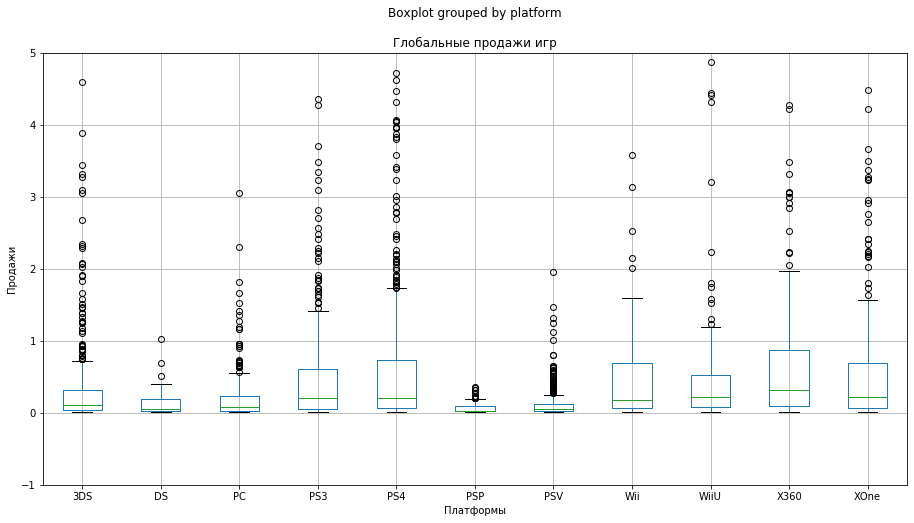

In [22]:
df.boxplot(column='total_sales', by='platform', figsize=(15, 8))
plt.title('Глобальные продажи игр')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.ylim(-1, 5)
plt.show()

В диаграммах размаха наблюдается очень сильный разброс значений. У популярных платфор есть масса очень популярных продаваемых игр, которые имеют запредельно большые продажи по отношению к сравнительно средним играм.

### Влияние отзывов на продажи
Для большого количества игр имеются данные с пользовательскими и профессиональными оценками. На примере одной популярной платформы проверим влияние отзывов на продаваемость игр.

В качестве популярной платформы была выбрана Play Station 4:

In [23]:
PS4 = df.query('platform == "PS4"')           #срез данных для Play Station 4 без пропущенных значений
PS4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
name               392 non-null object
platform           392 non-null object
year_of_release    392 non-null Int64
genre              392 non-null object
na_sales           392 non-null float64
eu_sales           392 non-null float64
jp_sales           392 non-null float64
other_sales        392 non-null float64
critic_score       252 non-null Int64
user_score         257 non-null float64
rating             392 non-null object
total_sales        392 non-null float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 40.6+ KB


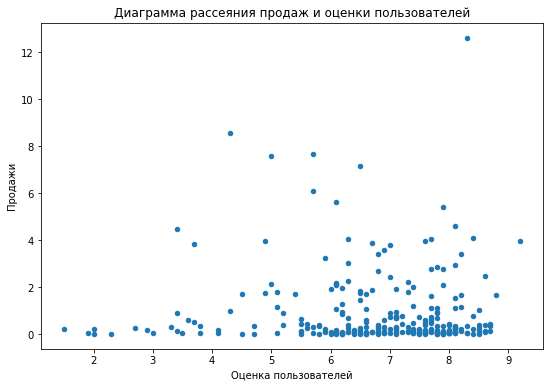

In [24]:
PS4.plot(x='user_score', y='total_sales', kind='scatter', title='Диаграмма рассеяния продаж и оценки пользователей', figsize=(9, 6))
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.show()

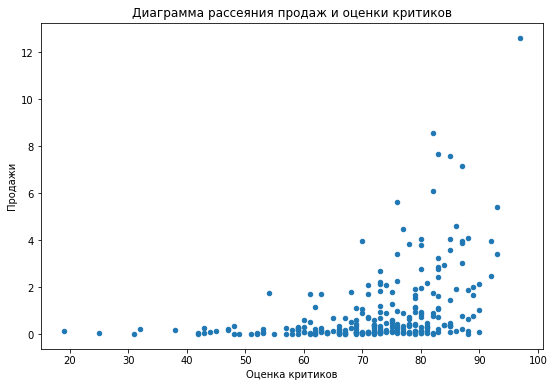

In [25]:
PS4.plot(x='critic_score', y='total_sales', kind='scatter', title='Диаграмма рассеяния продаж и оценки критиков', figsize=(9, 6))
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.show()

In [26]:
PS4[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Выполнив исследование вазаимосвязи между отзывами и продажами для одной из популярных платформ, можно утверждать о наличии достаточно явной прямой зависимости между оценками критиков и продажами игры (коэффициент Пирсона равен 0,407). А вот взаимосвяззь пользовательских оценок и продаваемости продукта практически отсутствует (коэффициент Пирсона -0,032). Видимо покупатели при покупке ориентируются на рецензии профессианалов, а не на общее мнение.

Построим матрицы корреляции и для других платформ:

In [27]:
for i in df['platform'].unique():
    data = df.query('platform == @i')
    print(f'Матрица корреляции для {i}:')
    display(data[['total_sales', 'critic_score', 'user_score']].corr())

Матрица корреляции для PS3:


,total_sales,critic_score,user_score
total_sales,1.000000,0.331497,-0.005144
critic_score,0.331497,1.000000,0.539456
user_score,-0.005144,0.539456,1.000000


Матрица корреляции для X360:


,total_sales,critic_score,user_score
total_sales,1.000000,0.360573,0.006164
critic_score,0.360573,1.000000,0.557352
user_score,0.006164,0.557352,1.000000


Матрица корреляции для PS4:


,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Матрица корреляции для 3DS:


,total_sales,critic_score,user_score
total_sales,1.000000,0.320803,0.197583
critic_score,0.320803,1.000000,0.722762
user_score,0.197583,0.722762,1.000000


Матрица корреляции для DS:


,total_sales,critic_score,user_score
total_sales,1.000000,NaN,0.882709
critic_score,NaN,NaN,NaN
user_score,0.882709,NaN,1.000000


Матрица корреляции для XOne:


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


Матрица корреляции для WiiU:


,total_sales,critic_score,user_score
total_sales,1.000000,0.34838,0.400219
critic_score,0.348380,1.00000,0.770080
user_score,0.400219,0.77008,1.000000


Матрица корреляции для Wii:


,total_sales,critic_score,user_score
total_sales,1.000000,-0.424341,0.296197
critic_score,-0.424341,1.000000,0.816295
user_score,0.296197,0.816295,1.000000


Матрица корреляции для PC:


,total_sales,critic_score,user_score
total_sales,1.000000,0.237243,-0.121867
critic_score,0.237243,1.000000,0.432587
user_score,-0.121867,0.432587,1.000000


Матрица корреляции для PSV:


,total_sales,critic_score,user_score
total_sales,1.000000,0.094488,-0.004339
critic_score,0.094488,1.000000,0.699199
user_score,-0.004339,0.699199,1.000000


Матрица корреляции для PSP:


,total_sales,critic_score,user_score
total_sales,1.000000,NaN,-0.802302
critic_score,NaN,NaN,NaN
user_score,-0.802302,NaN,1.000000


Все выше сказанное о играх разработанных для PS4 совершенно справедливо и для других платформ. За исключением того, что для игровых платформ 3DS, Wii, DS и WiiU коэффициент корреляции взаимосвязи отзывов пользователей и продаж, принимает весьма ощутимые значения (от 0.15 до 0.40). В чем особенность этих платформ, пока сложно сказать. 

### Распределение игр по жанрам
Необходимо оценить как распределены продажи игр по их жанрам. Постром столбчатую диаграмму с суммарным количеством продаж для каждого жанра:

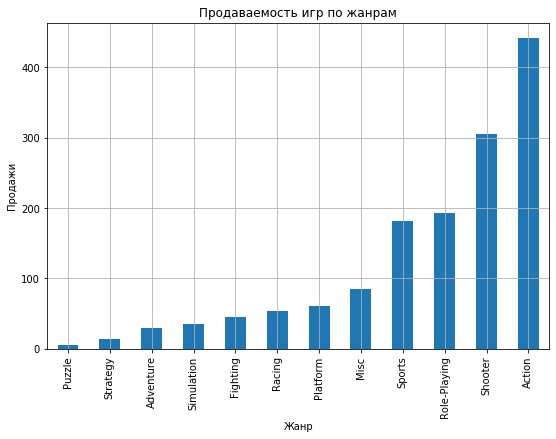

In [28]:
genre_df = df.groupby('genre').sum().sort_values('total_sales')
genre_df['total_sales'].plot(kind='bar', title='Продаваемость игр по жанрам', grid=True, figsize=(9, 6))
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.show()

По полученной диаграмме можно сказать, что данные распределены очень неравномерно. Если у самых продаваемых жанров прибыль составила в среднем около 300 млн., то у непопулярных жанров можно говорить о средней прибыли около 15 млн. Можно выделить, что наибольшую популярность имеют активные игры, с большим количеством действий и манипуляций, в то время как игры с малой активность и задействующие интеллект не очень интересны широкой публике.

In [29]:
df['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

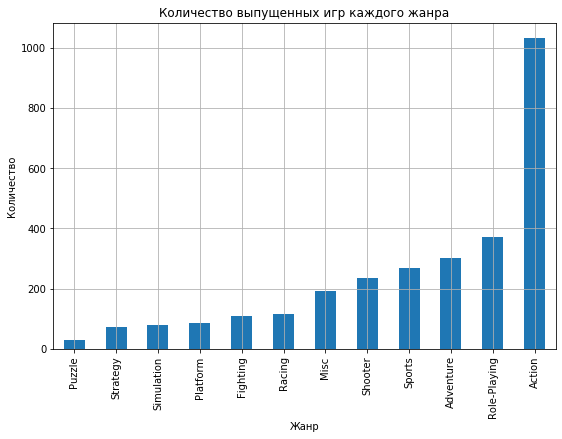

In [30]:
genre_df = df.groupby('genre').count().sort_values('total_sales')
genre_df['total_sales'].plot(kind='bar', title='Количество выпущенных игр каждого жанра', grid=True, figsize=(9, 6))
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.show()

Количество выпускаемых игра для каждого жанра слишком неодинаково. Поэтому нельзя утверждать, что жанр с наибольшей глобальной прибылью будет стабильно популярным и продаваемым, даже наоборот все продукты этого жанра претерпевают высокую конкуренцию, и сложно быть уверенным, что игра точно будет успешной. Более правильным подходом будет оценить характеристику положения данных для продаж каждой игры жанра. А поскольку эти данные не лишены большого количества выбросов, а количество игр от жанра к жанру не близки по своим значениям, лучше всего будет использовать структурную характеристику положения, а именно медиану. 

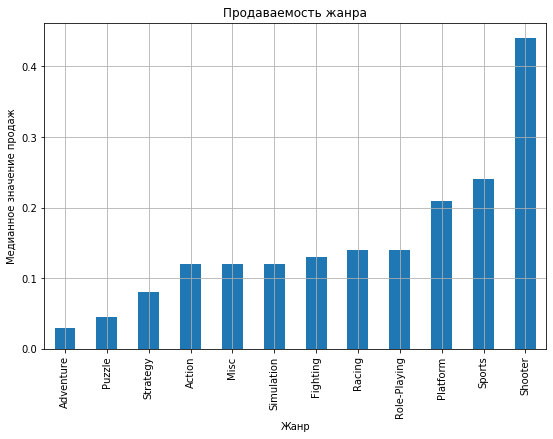

In [31]:
genre_df = df.groupby('genre').median().sort_values('total_sales')
genre_df['total_sales'].plot(kind='bar', title='Продаваемость жанра', grid=True, figsize=(9, 6))
plt.xlabel('Жанр')
plt.ylabel('Медианное значение продаж')
plt.show()

Можно утверждать, что самым прибильным жанром с большим отрывом является жанр - *Shooter*. Удивительно, но жанр *Action* который был лидером глобальных продаж даже не в вошел в топ-5.

### Вывод
Анализ данных завершен. По итогам удалось установить: актуальный период, потенциально прибыльные платформы, взаимосвязь продаж и отзывов и самые прибыльные жанры. Все это необходимо для ответа на поставленную задачу.

## Составление портрета пользователя каждого региона
Для того, чтобы составить портрет пользователя по регионам, нужно выделить самые популярные платформы и жанры. Это позволит составить представление о предпочтениях покупателей в различных регионах. В дополнение исследуем как в каждом регионе влияет возрастной рейтинг ESRB на продаваемость продукта.

### Самые популярные платформы в регионах
Составим рейтинг 5 самых популярных платформ для регионов *NA, EU, JP*:

In [32]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    d = df.pivot_table(index='platform', values=[i, 'total_sales'], aggfunc='sum').sort_values(i, ascending=False).head()
    d['share_total'] = round(d[i] / d['total_sales'], 3) * 100
    d['share_region'] = round(d[i] / d[i].sum(), 3) * 100
    display(d)

,na_sales,total_sales,share_total,share_region
platform,,,,
X360,140.05,236.54,59.2,28.0
PS4,108.74,314.14,34.6,21.7
PS3,103.38,288.79,35.8,20.7
XOne,93.12,159.32,58.4,18.6
3DS,55.31,194.61,28.4,11.0


,eu_sales,total_sales,share_total,share_region
platform,,,,
PS4,141.09,314.14,44.9,33.9
PS3,106.86,288.79,37.0,25.6
X360,74.52,236.54,31.5,17.9
XOne,51.59,159.32,32.4,12.4
3DS,42.64,194.61,21.9,10.2


,jp_sales,total_sales,share_total,share_region
platform,,,,
3DS,87.79,194.61,45.1,50.7
PS3,35.29,288.79,12.2,20.4
PSV,21.04,49.18,42.8,12.2
PS4,15.96,314.14,5.1,9.2
WiiU,13.01,82.19,15.8,7.5


Популярность платформ для исследуемых регионов весьма различна, это важно учитывать при распространении. Если оценивать долю продаж топовых платформ региона, то можно отметить, что в японском регионе есть ярковыраженный лидер, а в других регионах все не так однозначно. Так же, очень важно не забывать, что такие платформы как PS3, X360 и PSP хоть и находятся в топе, их время уходит, продажи неумолимо падают, поэтому не стоит на них ориентироваться.

### Самые популярные жанры в регионах
Составим рейтинг 5 самых популярных жанров для регионов *NA, EU, JP*:

In [33]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    data = df.pivot_table(index='genre', values=i, aggfunc=['sum', 'median'])
    data.columns = [f'{i}_sum', f'{i}_median']
    display(data.sort_values(f'{i}_median', ascending=False).head())

,na_sales_sum,na_sales_median
genre,,
Shooter,144.77,0.20
Platform,25.38,0.09
Sports,81.53,0.08
Fighting,19.79,0.05
Racing,17.22,0.04


,eu_sales_sum,eu_sales_median
genre,,
Shooter,113.47,0.17
Racing,27.29,0.09
Platform,21.41,0.08
Sports,69.09,0.05
Simulation,14.55,0.03


,jp_sales_sum,jp_sales_median
genre,,
Role-Playing,65.44,0.06
Fighting,9.44,0.03
Misc,12.86,0.02
Action,52.80,0.01
Adventure,8.24,0.01


Здесь стоит отметить специфику японского региона. Можно проследить, что жанры предпочитаемые в Америке и Европе, практически  идентичен, в то время как в Японии топ-5 жанров выглядит совсем подругому.

### Влияние рейтинга ESRB на продажи в регионах
Важно определить как возрастные ограничения влияют на продаваемость игр в отдельном регионе. Создадим сводную таблицу сгруппированую по рейтингу ESRB:

In [34]:
df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').sort_values('eu_sales', ascending=False)

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
M,193.96,21.20,231.57,63.38
E,113.03,28.33,114.37,31.44
undefined,91.50,108.84,103.31,27.17
E10+,55.37,8.19,75.70,16.23
T,52.96,26.02,66.02,17.94


Несомненно рейтинг влияет на продажи, и это справедливо для каждого региона. Наиболее активно продаюстя игры с рейтингом 17, затем идут 6+, игры без рейтинга, 10+, 13+... Однако очень важно заметить, что это совершенно не относится к японскому региону. Он максимально специфичен и не входит в общие рамки. В большей степени покупаемы игры без рейтинга, затем идут рейтинги: 6+, 13+, 17+, 10+ и тд. 

Мое личное предположение, что пользователи этого региона покупают в основном свои игры, которым попросту не присвоин рейтинг, из-за всемирной неактуальности, отсюда и другой список популярных жанров для Японии, просто совершенно другие интересы и свой собственный рынок для этого региона.

### Вывод
В этом разделе был составлен портрет пользователя каждого региона. Это необходимо для решения поставленной задачи, поскольку важно знать интересы и предпочтения, а также важные особенности и специфики, в различных регионах.

## Проверка гипотез

### Проверка гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим одинаковы ли средние значения пользовательского рейтинга для платформ *Xbox One* и *PC*. В этом поможет метод *ttest_ind* из библиотеки stats модуля scipy.

Прежде всего нужно строго сформулировать нулевую и альтернативную ей теории:

Нулевая теория(Н0) - cредние пользовательские рейтинги платформ Xbox One и PC **одинаковые**

Альтернативная теория(Н1) - cредние пользовательские рейтинги платформ Xbox One и PC **разные**

In [35]:
array_PC = df[(df['platform'] == 'PC') & (df['user_score'].notnull())]['user_score']
array_XOne = df[(df['platform'] == 'XOne') & (df['user_score'].notnull())]['user_score']

alpha = 0.05

results = st.ttest_ind(array_PC, array_XOne)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

p-значение: 0.5535080500643661
Не удалось отвергнуть нулевую гипотезу.


В ходе исследования было получено очень высокое р-значение, всвязи с этим нулевую гипотезу просто невозможно отвергнуть, значит можно утверждать, что средние пользовательские рейтинги платформ Xbox One и PC предположительно **одинаковые**.

### Проверка гипотезы: cредние пользовательские рейтинги жанров Action и Sports разные

Теперь исследуем другое предположение. Действительно ли средние значения пользовательского рейтинга жанров *Action* и *Sports* различны. В этом поможет тот же метод, который использовали для предыдущей гипотезы.

Прежде всего нужно строго сформулировать нулевую и альтернативную ей теории:

Нулевая теория(Н0) - cредние пользовательские рейтинги жанров Action и Sports **равны**

Альтернативная теория(Н1) - cредние пользовательские рейтинги жанров Action и Sports **не равны**

In [36]:
array_A = df[(df['genre'] == 'Action') & (df['user_score'].notnull())]['user_score']
array_S = df[(df['genre'] == 'Sports') & (df['user_score'].notnull())]['user_score']

alpha = 0.05

results = st.ttest_ind(array_A, array_S)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.')

p-значение: 3.716308946093486e-26
Отвергаем нулевую гипотезу.


Нулевая гипотеза определенно отвергнута, а значит **нельзя** утверждать, что cредние пользовательские рейтинги жанров Action и Sports **одинаковые**. Следовательно гипотеза о **различии** средних пользовательских оценок **подтвердилась**.

### Вывод
В настоящем шаге исследовательского проекта, с помощью статистических методов анализа данных, были проверены две гипотезы, и обе гипотезы были подтверждены.

## Общий вывод

Проделав данную проектную работу, мне удалось вспомнить и закрепить знания полученные за весь модуль. А так же выполинить задачу поставленню заказчиком, по выявлению закономерностей определяющих успешность игры. Чтобы определить успешную игру необходимо учесть некоторые факторы:
- Потенциально успешная платформа. Не стоит продвигать продукты разработанные для не самых успешных и непопулярных платформ, а также для устаревших игровых средсв. На 2017 год к перспективным можно отнести: *Xbox One, Play Station 4, WiiU, 3DS и PC*;
- Рейтинги критиков и пользователей. В первую очередь необходимь ориентироваться на игры, отзывы критиков о которых имеют высокие показатели;
- Жанр игры. Несомнено во главе стоит ставить распространение игр с самыми успешными и популярными жанрами (прежде всего *Shooting*, затем *Platform, Racing, Fighting и Sports*);
- Рейтинг *ESRB*. Наибольшее число продаж имеют игры для детей и подростков;
- Регион. Очень важно учитывать интересы пользователей региона в котором игра будет продвигаться.
Все это просто необходимо при определении потенциально успешного продукта и планировании рекламной компании.